In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [6]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [7]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)
print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [10]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [12]:
# horizontal flip
image_gen = ImageDataGenerator(rescale=1. / 255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


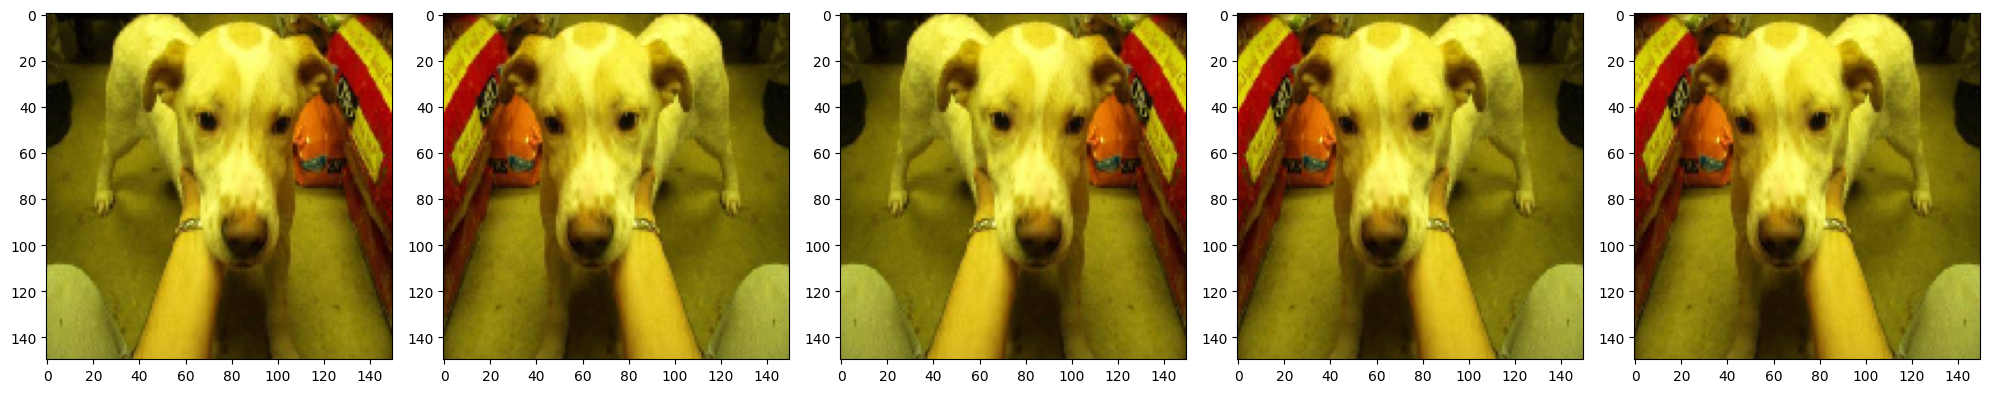

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [14]:
# rotation
image_gen = ImageDataGenerator(rescale=1. / 255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


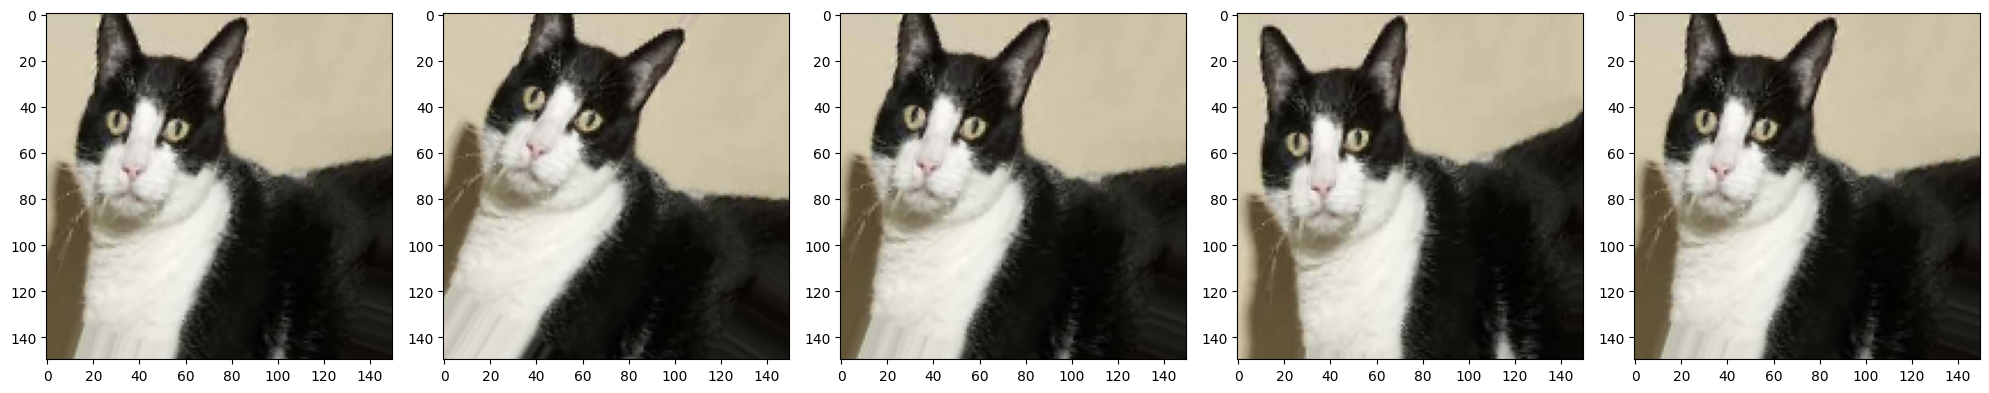

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [16]:
# zoom
image_gen = ImageDataGenerator(rescale=1. / 255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


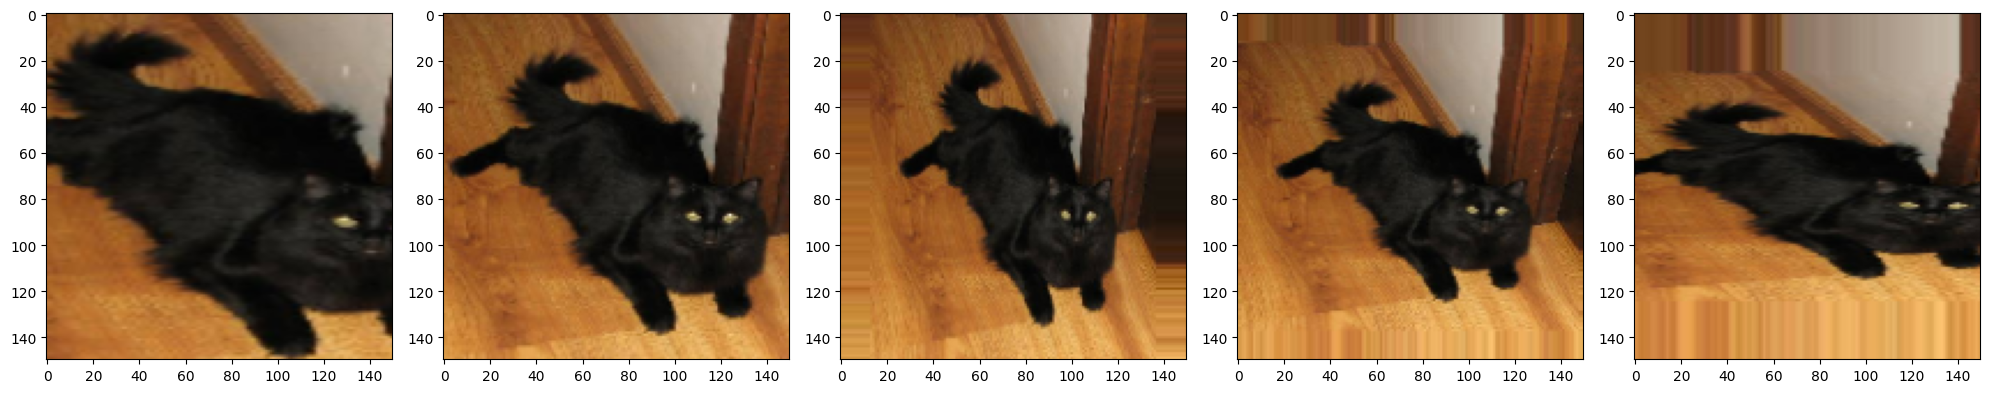

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [18]:
image_gen_train = ImageDataGenerator(rescale=1. / 255, rotation_range=45, width_shift_range=.2, height_shift_range=.2,
                                     shear_range=0.2,
                                     horizontal_flip=True, zoom_range=0.5, fill_mode='nearest')
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True,
                                                     target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='binary')

Found 2000 images belonging to 2 classes.


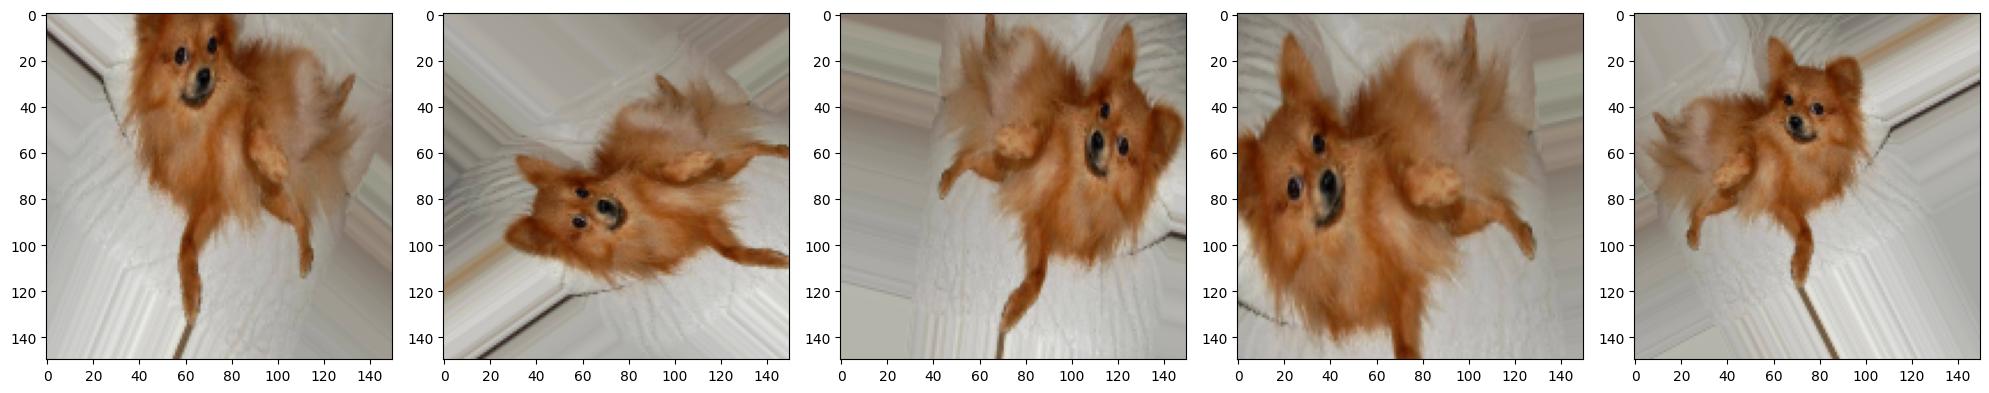

In [19]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [20]:
image_gen_val = ImageDataGenerator(rescale=1. / 255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, directory=validation_dir, shuffle=False,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='binary')

Found 1000 images belonging to 2 classes.


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)  # activation='softmax'
])

In [22]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
epochs = 100
history = model.fit_generator(train_data_gen, steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
                              epochs=epochs, validation_data=val_data_gen,
                              validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))))

C:\Users\JEANNOEL\AppData\Local\Temp\ipykernel_14028\194805157.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),


Epoch 1/100
20/20 [==============================] - 38s 2s/step - loss: 0.7037 - accuracy: 0.5180 - val_loss: 0.6911 - val_accuracy: 0.6260
Epoch 2/100
20/20 [==============================] - 26s 1s/step - loss: 0.6838 - accuracy: 0.5550 - val_loss: 0.6647 - val_accuracy: 0.5850
Epoch 3/100
20/20 [==============================] - 25s 1s/step - loss: 0.6686 - accuracy: 0.5785 - val_loss: 0.6412 - val_accuracy: 0.6360
Epoch 4/100
20/20 [==============================] - 26s 1s/step - loss: 0.6639 - accuracy: 0.5630 - val_loss: 0.6461 - val_accuracy: 0.5890
Epoch 5/100
20/20 [==============================] - 25s 1s/step - loss: 0.6475 - accuracy: 0.6010 - val_loss: 0.6120 - val_accuracy: 0.6530
Epoch 6/100
20/20 [==============================] - 25s 1s/step - loss: 0.6411 - accuracy: 0.6305 - val_loss: 0.6252 - val_accuracy: 0.6430
Epoch 7/100
20/20 [==============================] - 26s 1s/step - loss: 0.6333 - accuracy: 0.6500 - val_loss: 0.6204 - val_accuracy: 0.6270
Epoch 8/100
2

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()